In [6]:
import pandas as pd


df = pd.read_csv("data/inflation.csv", parse_dates=True, index_col="Month")
df = df[df.index >= "2005-01-01"]
df.head()

,Inflation
Month,
2005-01-01,7.3
2005-02-01,7.3
2005-03-01,7.1
2005-04-01,7.2
2005-05-01,7.3


In [ ]:
# Holt winter
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from utils import split_fixed, get_metrics, split_ratio
from models import holt_win_search


train, test = split_ratio(df)

holt_win_search(train, test)


Split -- Total: 240, Train: 192, Test: 48


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473

,Trend,Seasonality,BoxCox,MAPE (%),MAE,MSE
3,multiplicative,additive,False,30.053,1.655286,5.028830
2,multiplicative,additive,True,31.952,1.785829,5.663343
0,multiplicative,multiplicative,True,40.236,2.200262,7.813802
7,additive,additive,False,190.587,6.951736,75.716253
6,additive,additive,True,251.577,9.103179,140.113584
5,additive,multiplicative,False,256.915,9.588360,136.136260
4,additive,multiplicative,True,478.391,17.760327,504.995351
1,multiplicative,multiplicative,False,5488.016,176.624364,90519.151231


c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


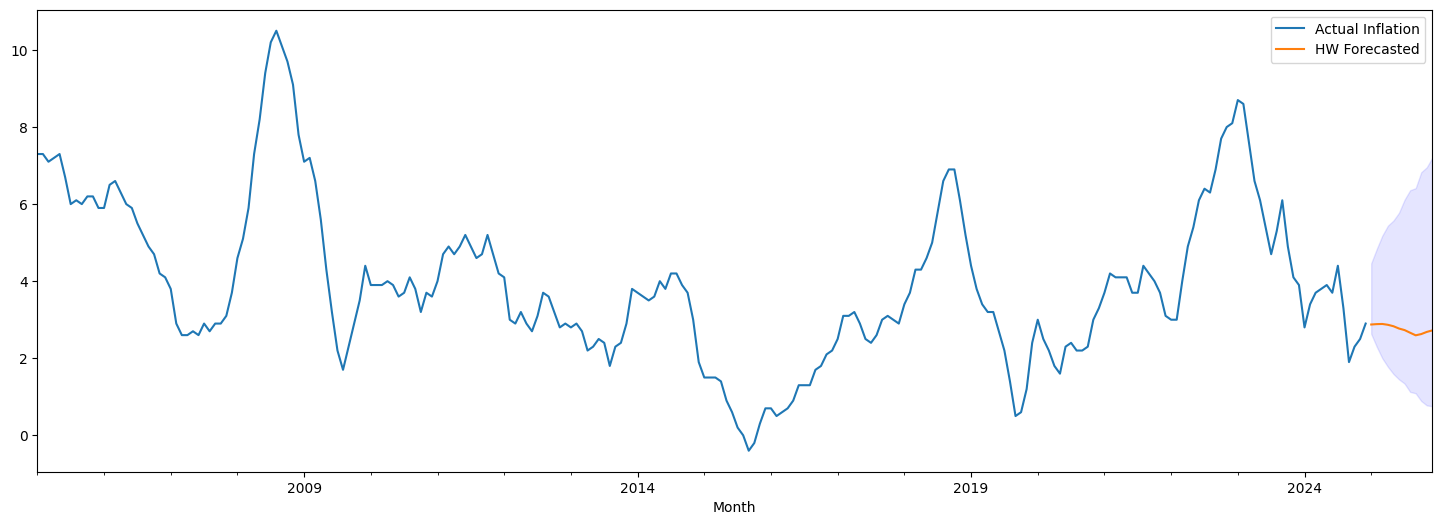

In [20]:
# Apply to whole data
import matplotlib.pyplot as plt

alpha = df.min().iloc[0] + 1
modelMul = ExponentialSmoothing(
    df + alpha,
    seasonal_periods=12,
    trend="multiplicative",
    seasonal="additive",
    use_boxcox=True,
).fit()

f = modelMul.forecast(12) - alpha
df["Inflation"].plot(legend=True, label="Actual Inflation")
f.plot(label="HW Forecasted", legend=True, figsize=(18,6))

n_steps_prediction = 12 
n_repetitions = 1000

df_simul = modelMul.simulate(
    nsimulations=n_steps_prediction,
    repetitions=n_repetitions,
    anchor='end',
)

upper_ci = df_simul.quantile(q=0.975, axis='columns')
lower_ci = df_simul.quantile(q=0.025, axis='columns')
plt.fill_between(f.index, lower_ci, upper_ci, color='blue', alpha=0.1)
plt.show()
